m = 1115.2223288029122 +- 7.075382446165897
n = 47.91761444861319 +- 1.2310437241643057
Chi2       = 28.7012871120969
dof        = 20
Chi2_red   = 1.435064355604845


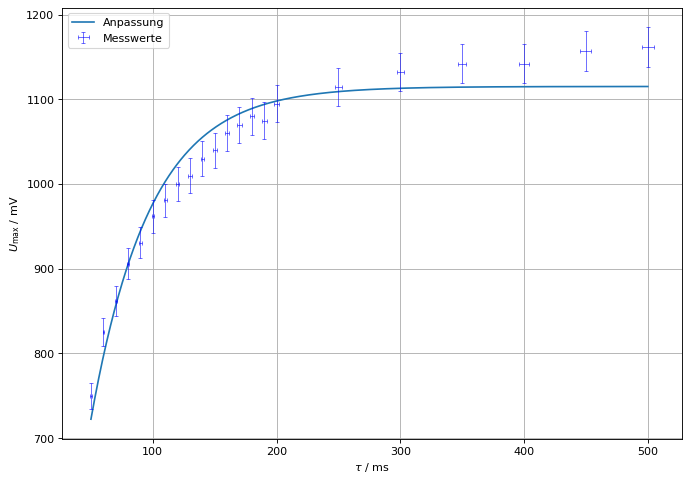

In [6]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.stats import chisquare

figure(figsize=(10,7), dpi=80)

#files = glob.glob('*/*.csv')

#umax=np.empty(26)
#tum=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50])

#for i in range(5,31):
          
#    tau=np.loadtxt(files[i],skiprows=2,delimiter=',',usecols=0)
#    U=np.loadtxt(files[i],skiprows=2,delimiter=',', usecols=1)
#    peaks, _=find_peaks(U,height=5)
#    #print(peaks,U[peaks.item(1)])
#    umax[i-5]=U[peaks.item(1)]
#    print(peaks.item(1)-peaks.item(0),i)
    
#plt.errorbar(tau,U,xerr=0.03*tau,yerr=0.03*U, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Envelope')
umax = np.loadtxt('../data/saettigung.txt', skiprows=5, usecols=1)
tau = np.loadtxt('../data/saettigung.txt', skiprows=5, usecols=0)
dumax=0.02*umax
#dumax=[20]*len(umax)
dtau=0.01*tau

def f(x,m,n):
    return m*(1-np.exp(-x/n))

popt, pcov=curve_fit(f,tau,umax,
                     sigma=dumax,
                     absolute_sigma=True,
                     p0 = [1160, 60],
                     bounds = ([0, 0], [np.inf, np.inf]))
perr=np.sqrt(np.diag(pcov))
tau_fit = np.linspace(min(tau), max(tau), 1000)
plt.plot(tau_fit,f(tau_fit,*popt), label='Anpassung')


#print(chisquare(umax,f_exp=f(tum,*popt)))

print("m =", popt[0], "+-", perr[0])
print("n =", popt[1], "+-", perr[1])

# compute chi-square
chi2 = np.sum(((umax - f(tau, *popt)) / dumax)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(tau) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)



plt.errorbar(tau,umax,xerr=dtau,yerr=dumax, ls='', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Messwerte')
#plt.plot(tum,umax)
plt.xlabel(r'$\tau$ / ms')
plt.ylabel(r'$U_{\mathrm{max}}$ / mV')
plt.grid(which='minor',linewidth=0.2)
plt.grid(which='major')
plt.legend(loc='upper left')
plt.savefig('../plots/saettigung.pdf')